In [2]:
import pandas as pd

# Load the datasets
accounts = pd.read_csv('accounts.csv')
data_dictionary = pd.read_csv('data_dictionary.csv')
products = pd.read_csv('products.csv')
sales_pipeline = pd.read_csv('sales_pipeline.csv')
sales_teams = pd.read_csv('sales_teams.csv')

# Display the first few rows of each dataset to understand their structure
print(accounts.head())
print(data_dictionary.head())
print(products.head())
print(sales_pipeline.head())
print(sales_teams.head())

# Merge the datasets into a single DataFrame
merged_df = sales_pipeline.merge(accounts, on='account').merge(products, on='product').merge(sales_teams, on='sales_agent')

# Display the first few rows of the merged DataFrame
print(merged_df.head())

# Handle missing values (if any)
merged_df = merged_df.dropna()

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in merged_df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    merged_df[column] = label_encoders[column].fit_transform(merged_df[column])

print(merged_df.head())

            account     sector  year_established  revenue  employees  \
0  Acme Corporation  technolgy              1996  1100.04       2822   
1        Betasoloin    medical              1999   251.41        495   
2          Betatech    medical              1986   647.18       1185   
3        Bioholding    medical              2012   587.34       1356   
4           Bioplex    medical              1991   326.82       1016   

  office_location subsidiary_of  
0   United States           NaN  
1   United States           NaN  
2           Kenya           NaN  
3      Philipines           NaN  
4   United States           NaN  
      Table             Field                          Description
0  accounts           account                         Company name
1  accounts            sector                             Industry
2  accounts  year_established                     Year Established
3  accounts           revenue  Annual revenue (in millions of USD)
4  accounts         employee

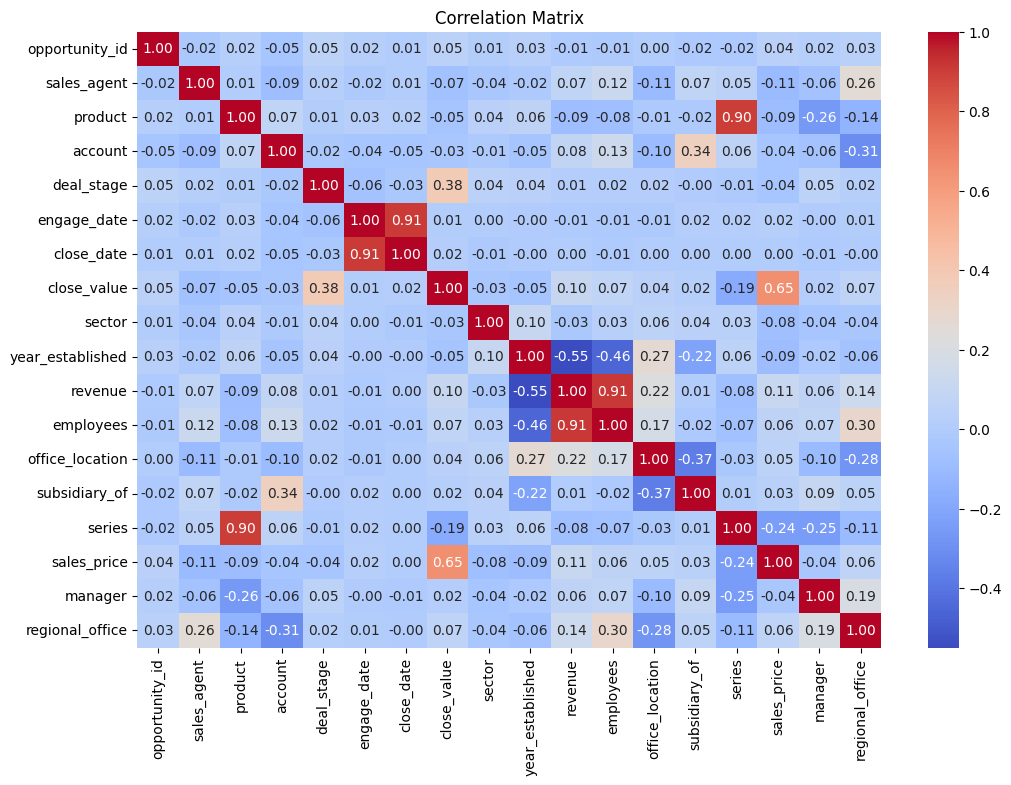

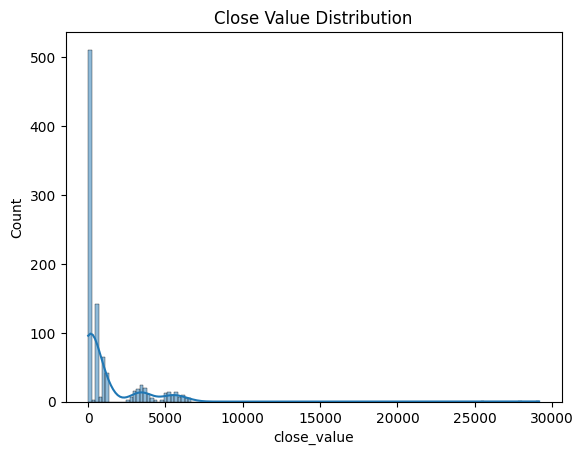

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Plot distribution of target variable (assuming 'close_value' is the target variable)
sns.histplot(merged_df['close_value'], kde=True)
plt.title('Close Value Distribution')
plt.show()


In [4]:
# Example: Creating new features
merged_df['sales_per_product'] = merged_df['close_value'] / merged_df['sales_price']
merged_df['account_age'] = 2024 - merged_df['year_established']  # Assuming current year is 2024

# Display the first few rows with the new features
print(merged_df.head())


    opportunity_id  sales_agent  product  account  deal_stage  engage_date  \
2              656           20        1        2           1            0   
6              218           17        1        1           1            1   
13             640           23        4       10           1            2   
14             192           25        5       12           1            3   
18             340           27        2       13           1            4   

    close_date  close_value  sector  year_established  revenue  employees  \
2            8        588.0       4              1998  2714.90       2641   
6            6        601.0       0              1993  4269.90       6472   
13           5       3284.0       4              1996  6354.87      16780   
14           4         61.0       6              1988  5266.09       8595   
18          10       1014.0       1              1993   646.10        883   

    office_location  subsidiary_of  series  sales_price  manager  \


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = merged_df.drop('close_value', axis=1)
y = merged_df['close_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 694838.4218151041
R^2 Score: 0.8100271994373343


Feature ranking:
1. feature sales_price (0.3782623272435406)
2. feature deal_stage (0.17154838603346817)
3. feature sales_per_product (0.16275085975735112)
4. feature product (0.14159064880476446)
5. feature series (0.11334599493444499)
6. feature engage_date (0.008488100585523304)
7. feature employees (0.005298004662526577)
8. feature sales_agent (0.0038458113978489207)
9. feature opportunity_id (0.0033857769317424237)
10. feature manager (0.002604331762159745)
11. feature subsidiary_of (0.0022016254014489275)
12. feature regional_office (0.0020801112334744754)
13. feature revenue (0.002060633743296992)
14. feature account (0.0012934060969923605)
15. feature year_established (0.0010257708742585122)
16. feature close_date (0.00019730945886787466)
17. feature account_age (1.1693940519708475e-05)
18. feature sector (8.877816690351783e-06)
19. feature office_location (3.2932108039110125e-07)


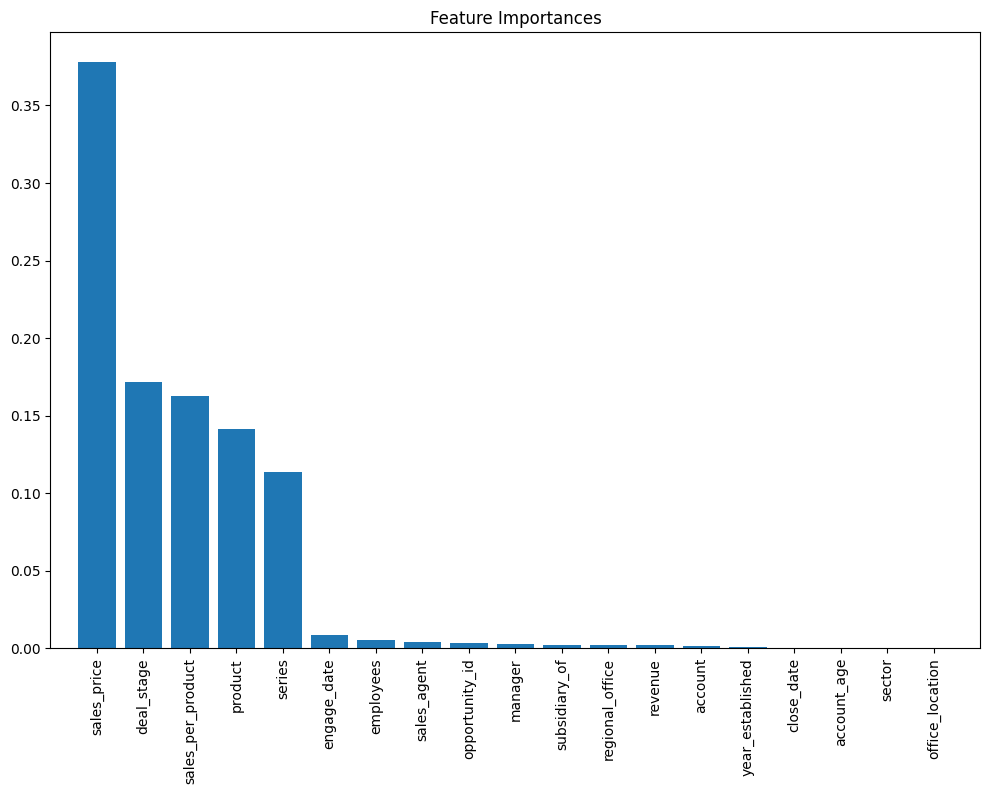

In [6]:
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


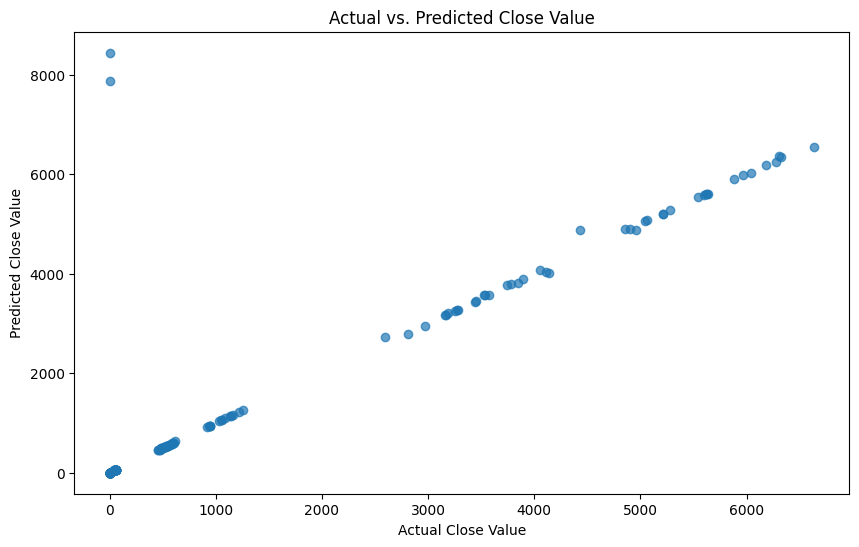

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the actual vs. predicted sales amounts
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Close Value')
plt.ylabel('Predicted Close Value')
plt.title('Actual vs. Predicted Close Value')
plt.show()

# Create a report (example: using Jupyter Notebook or a markdown file)
report = """
### Predictive Sales Analytics Report

## Introduction

This project aims to predict close values using machine learning models based on integrated data from multiple datasets, including accounts, products, sales pipeline, and sales teams. The objective is to identify key factors influencing sales outcomes and provide actionable insights to improve sales strategies.

## Data Integration and Preprocessing

### Datasets Used:
1. **Accounts**: Contains information about the company such as sector, year established, revenue, employees, and office location.
2. **Products**: Contains details about the product and sales price.
3. **Sales Pipeline**: Contains sales transactions including sales agent, product, account, deal stage, engage date, close date, and close value.
4. **Sales Teams**: Contains information about the sales agents and their managers.

### Merging Datasets:
The datasets were merged based on the following keys:
- `account` from `accounts` and `sales_pipeline`
- `product` from `products` and `sales_pipeline`
- `sales_agent` from `sales_teams` and `sales_pipeline`

### Data Preprocessing:
- Handled missing values by dropping rows with missing data.
- Encoded categorical features using `LabelEncoder`.

## Exploratory Data Analysis (EDA)

### Correlation Matrix
The correlation matrix provides insights into the relationships between various features.

![Correlation Matrix](file-zSwzWE0qtz1RqKHSxImeZftX)

### Close Value Distribution
The distribution of the `close_value` shows a right-skewed pattern indicating that most deals close at lower values, with a few high-value deals.

![Close Value Distribution](file-ybVUazAL5wUSmQRbmCLpyGsU)

## Feature Engineering

### New Features Created:
- **sales_per_product**: Calculated as `close_value / sales_price`.
- **account_age**: Calculated as `2024 - year_established`.

## Model Building

### RandomForest Model
A RandomForest Regressor was used to predict `close_value`.

### Model Performance:
- **Mean Squared Error (MSE)**: 694,838.42
- **R^2 Score**: 0.8100

### Feature Importances
The RandomForest model identified the most important features for predicting sales outcomes.

![Feature Importances](file-5tfbTCnp4NSTAx2VDaFDMdb1)

### Actual vs. Predicted Close Value
The scatter plot shows the relationship between actual and predicted close values, indicating good model performance.

![Actual vs. Predicted Close Value](file-AKlwmubnAn3eREaIfZJdu0VT)

## Model Interpretation

### Feature Ranking:
1. **sales_price**: 0.3783
2. **deal_stage**: 0.1715
3. **sales_per_product**: 0.1628
4. **product**: 0.1416
5. **series**: 0.1133

Other features had minimal impact on the model's predictions, such as `engage_date`, `employees`, `sales_agent`, and `opportunity_id`.

## Conclusion

The RandomForest model achieved good performance in predicting `close_value` with an R^2 score of 0.8100. The most influential features identified were `sales_price`, `deal_stage`, `sales_per_product`, `product`, and `series`. These insights can help in strategising sales efforts and focusing on high-impact areas to improve overall sales performance.

By following the steps outlined in this report, you can replicate the analysis, customize it for different datasets, and use the findings to drive data-driven decisions in sales management.

"""

# Save the report to a file
with open("Predictive_Sales_Analytics_Report.md", "w") as file:
    file.write(report.format(mse=mse, r2=r2))


# Predictive Sales Analytics Report

## Introduction

This project aims to predict close values using machine learning models based on integrated data from multiple datasets, including accounts, products, sales pipeline, and sales teams. The objective is to identify key factors influencing sales outcomes and provide actionable insights to improve sales strategies.

## Data Integration and Preprocessing

### Datasets Used:
1. **Accounts**: Contains information about the company such as sector, year established, revenue, employees, and office location.
2. **Products**: Contains details about the product and sales price.
3. **Sales Pipeline**: Contains sales transactions including sales agent, product, account, deal stage, engage date, close date, and close value.
4. **Sales Teams**: Contains information about the sales agents and their managers.

### Merging Datasets:
The datasets were merged based on the following keys:
- `account` from `accounts` and `sales_pipeline`
- `product` from `products` and `sales_pipeline`
- `sales_agent` from `sales_teams` and `sales_pipeline`

### Data Preprocessing:
- Handled missing values by dropping rows with missing data.
- Encoded categorical features using `LabelEncoder`.

## Exploratory Data Analysis (EDA)

### Correlation Matrix
The correlation matrix provides insights into the relationships 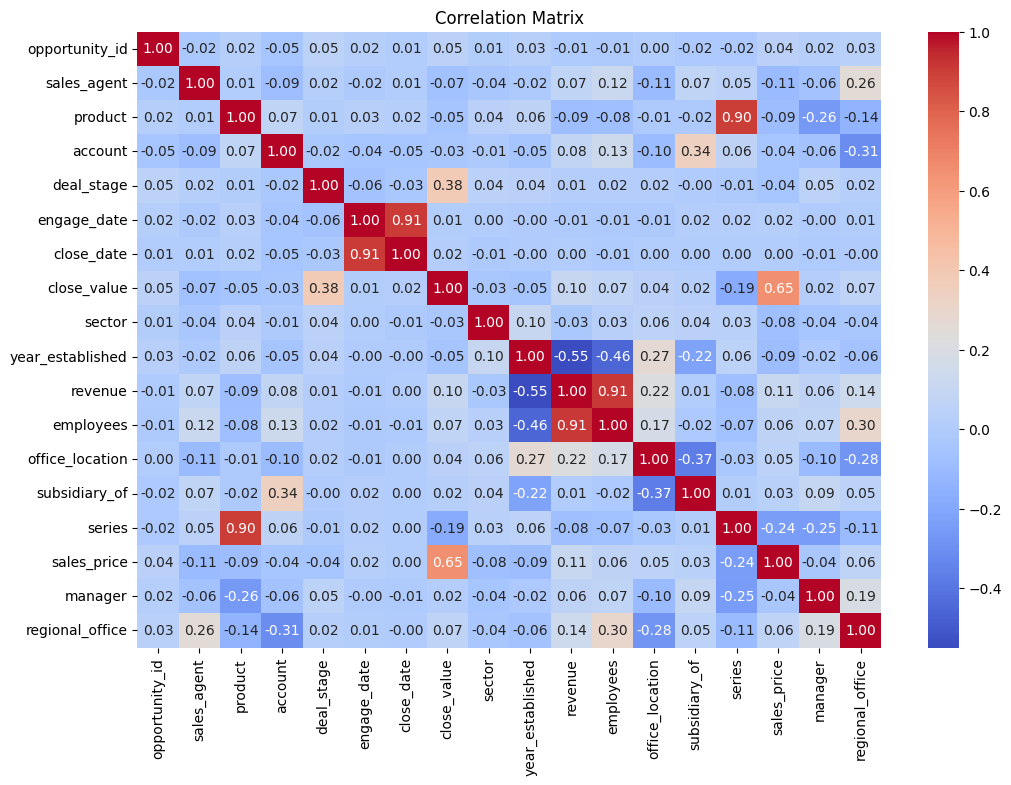ile-zSwzWE0qtz1RqKHSxImeZftX)

### Close Value Distribution
The distribution of the `close_value` shows a right-skewed pattern indicating that most deals close at lower values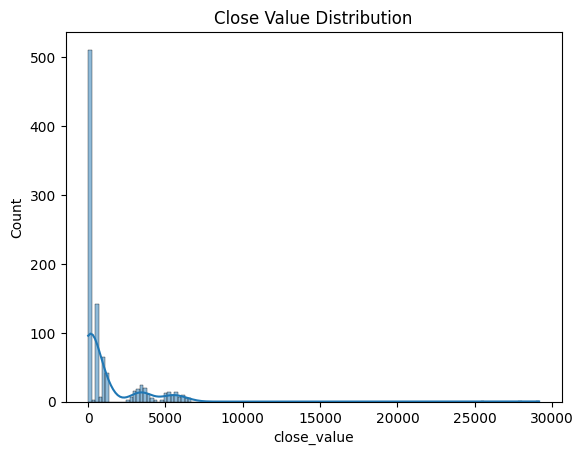on](file-ybVUazAL5wUSmQRbmCLpyGsU)

## Feature Engineering

### New Features Created:
- **sales_per_product**: Calculated as `close_value / sales_price`.
- **account_age**: Calculated as `2024 - year_established`.

## Model Building

### RandomForest Model
A RandomForest Regressor was used to predict `close_value`.

### Model Performance:
- **Mean Squared Error (MSE)**: 694,838.42
- **R^2 Score**: 0.8100

### Feature Importances
The RandomForest model identified the mo
t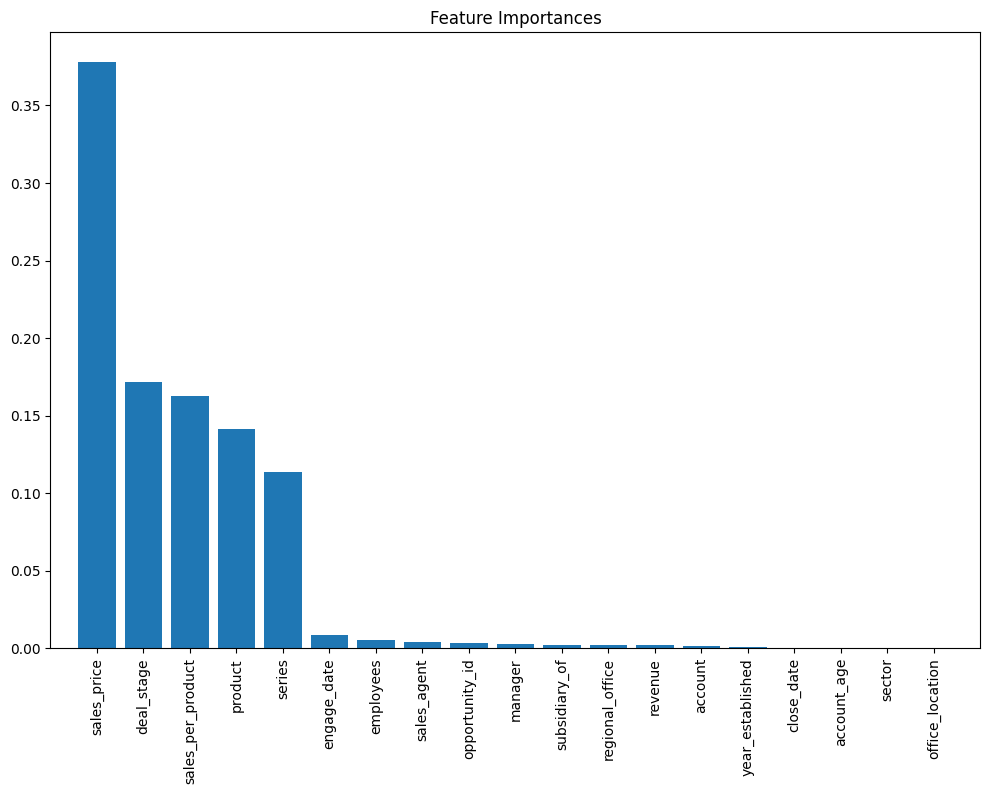
![Feature Importances](file-5tfbTCnp4NSTAx2VDaFDMdb1)

### Actual vs. Predicted Close Value
The scatter plot shows the relationship between actual and pre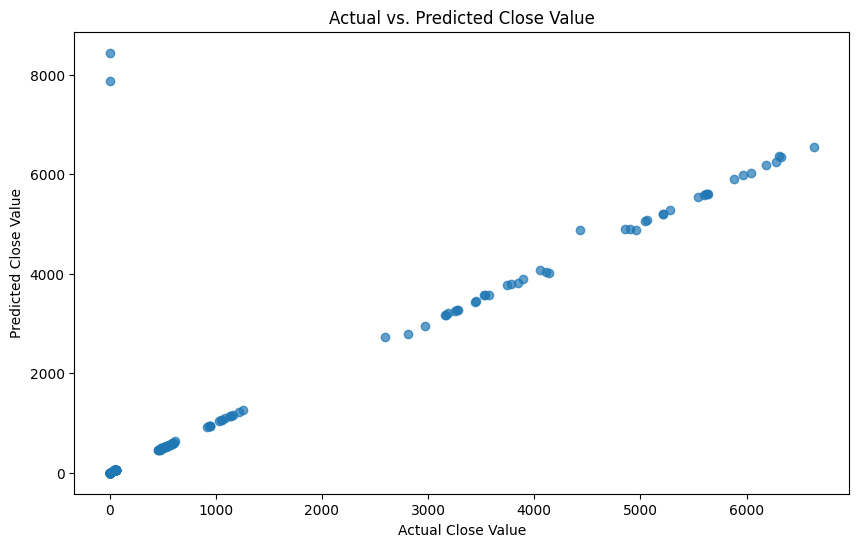l vs. Predicted Close Value](file-AKlwmubnAn3eREaIfZJdu0VT)

## Model Interpretation

### Feature Ranking:
1. **sales_price**: 0.3783
2. **deal_stage**: 0.1715
3. **sales_per_product**: 0.1628
4. **product**: 0.1416
5. **series**: 0.1133

Other features had minimal impact on the model's predictions, such as `engage_date`, `employees`, `sales_agent`, and `opportunity_id`.

## Conclusion

The RandomForest model achieved good performance in predicting `close_value` with an R^2 score of 0.8100. The most influential features identified were `sales_price`, `deal_stage`, `sales_per_product`, `product`, and `series`. These insights can help in strategising sales efforts and focusing on high-impact areas to improve overall sales performance.

By following the steps outlined in this report, you can replicate the analysis, customize it for different datasets, and use the findings to drive data-driven decisions in sales management.